Notebook to extract data from fprints to the log.txt file in Atlantis

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

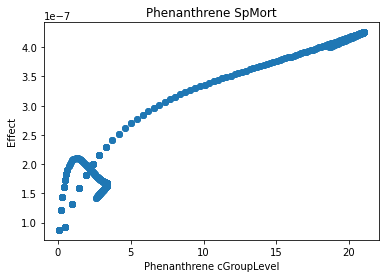

In [4]:
# Read the log.txt file
folder_name = "7a-EquationsPaper-SpMort-Phe-tempOFF"
filename = "spMort_Phe_tempOFF"
pattern = 'Phenanthrene cGroupLevel'

with open("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/"+folder_name +"/log.txt", "r") as file:
    row_text = file.readlines()

# First condition: keep rows with pattern
contaminant_row_data = [line for line in row_text if re.search(pattern, line)]

# Function to extract the desired words from each line
def extract_word(line, position):
    words = line.split()
    return words[position - 1] if len(words) >= position else None

# Extract data into lists
time = [float(extract_word(line, 2)) for line in contaminant_row_data]
group = [extract_word(line, 4) for line in contaminant_row_data]
cGroupLevel = [float(extract_word(line, 7)) for line in contaminant_row_data]
effect = [float(extract_word(line, 9)) for line in contaminant_row_data]

# Create a pandas DataFrame
contaminant_effect = pd.DataFrame({
    'Time': time,
    'Group': group,
    'cGroupLevel': cGroupLevel,
    'Effect': effect
})

# Plotting the data (optional, requires matplotlib)
plt.scatter(contaminant_effect['cGroupLevel'], contaminant_effect['Effect'])
plt.xlabel(pattern)
plt.ylabel('Effect')
plt.title('Phenanthrene SpMort')
plt.show()

# Save the data to a CSV file
contaminant_effect.to_csv(filename+".csv", index=False)

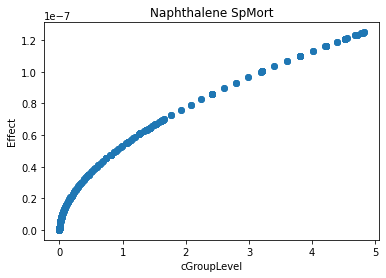

In [10]:
# Plotting the data (optional, requires matplotlib)
effects_path = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/7a-EquationsPaper-SpMort-Naph-tempOFF/spMort_Naph_tempOFF.csv"
Contam_effects = pd.read_csv(effects_path)
plt.scatter(Contam_effects['cGroupLevel'], Contam_effects['Effect'])
plt.xlabel('cGroupLevel')
plt.ylabel('Effect')
plt.title('Naphthalene SpMort')
plt.show()

Extracting data on mortality, growth and reporduction for higher trophic levels

In [6]:
# Read the log.txt file
folder_name = "7a-EquationsPaper-ZL-kgrowth"
filename = "ZL-kgrowth"
pattern = 'C_growth_corr'

with open("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/"+folder_name +"/log.txt", "r") as file:
    row_text = file.readlines()

# First condition: keep rows with pattern
contaminant_row_data = [line for line in row_text if re.search(pattern, line)]

# Function to extract the desired words from each line
def extract_word(line, position):
    words = line.split()
    return words[position - 1] if len(words) >= position else None

# Extract data into lists
time = [float(extract_word(line, 2)) for line in contaminant_row_data]
group = [extract_word(line, 4) for line in contaminant_row_data]
contam = [extract_word(line, 5) for line in contaminant_row_data]
cGroupLevel = [float(extract_word(line, 7)) for line in contaminant_row_data]
effect = [float(extract_word(line, 9)) for line in contaminant_row_data]

# Create a pandas DataFrame
contaminant_effect = pd.DataFrame({
    'Time': time,
    'Group': group,
    'Contaminant': contam,
    'cGroupLevel': cGroupLevel,
    'Effect': effect
})

# Save the data to a CSV file
contaminant_effect.to_csv(filename+".csv", index=False)

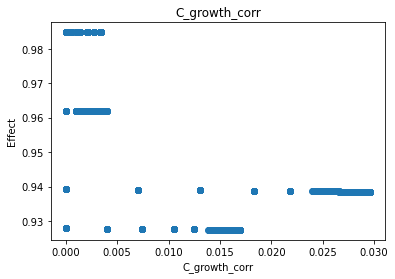

In [7]:
# Plotting the data (optional, requires matplotlib)
plt.scatter(contaminant_effect['cGroupLevel'], contaminant_effect['Effect'])
plt.xlabel(pattern)
plt.ylabel('Effect')
plt.title(pattern)
plt.show()

In [2]:
# Read the log.txt file
folder_name = "7a-EquationsPaper-FHE-effects-after300d"
with open("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/"+folder_name +"/log.txt", "r") as file:
    row_text = file.readlines()

In [3]:
filename = "FHE-kreprod"
pattern = 'C_reprod_corr'

# First condition: keep rows with pattern
contaminant_row_data = [line for line in row_text if re.search(pattern, line)]

# Function to extract the desired words from each line
def extract_word(line, position):
    words = line.split()
    return words[position - 1] if len(words) >= position else None

# Extract data into lists
time = [float(extract_word(line, 2)) for line in contaminant_row_data]
group = [extract_word(line, 4) for line in contaminant_row_data]
contam = [extract_word(line, 5) for line in contaminant_row_data]
cGroupLevel = [float(extract_word(line, 7)) for line in contaminant_row_data]
effect = [float(extract_word(line, 9)) for line in contaminant_row_data]

# Create a pandas DataFrame
contaminant_effect = pd.DataFrame({
    'Time': time,
    'Group': group,
    'Contaminant': contam,
    'cGroupLevel': cGroupLevel,
    'Effect': effect
})

# Save the data to a CSV file
contaminant_effect.to_csv(filename+".csv", index=False)

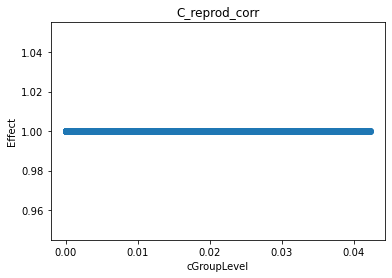

In [4]:
# Plotting the data (optional, requires matplotlib)
plt.scatter(contaminant_effect['cGroupLevel'], contaminant_effect['Effect'])
plt.xlabel('cGroupLevel')
plt.ylabel('Effect')
plt.title(pattern)
plt.show()

No reproduction effects observed because Cbio needs to be > C_chronic, which has not happened within the 90 days of this run for any of the contaminants.

In [5]:
filename = "FHE-Mcontam"
pattern = 'FHEcontaminantSpMort'

# First condition: keep rows with pattern
contaminant_row_data = [line for line in row_text if re.search(pattern, line)]

# Function to extract the desired words from each line
def extract_word(line, position):
    words = line.split()
    return words[position - 1] if len(words) >= position else None

# Extract data into lists
time = [float(extract_word(line, 2)) for line in contaminant_row_data]
group = [extract_word(line, 4) for line in contaminant_row_data]
contam = [extract_word(line, 5) for line in contaminant_row_data]
cGroupLevel = [float(extract_word(line, 7)) for line in contaminant_row_data]
effect = [float(extract_word(line, 9)) for line in contaminant_row_data]

# Create a pandas DataFrame
contaminant_effect = pd.DataFrame({
    'Time': time,
    'Group': group,
    'Contaminant': contam,
    'cGroupLevel': cGroupLevel,
    'Effect': effect
})

# Save the data to a CSV file
contaminant_effect.to_csv(filename+".csv", index=False)

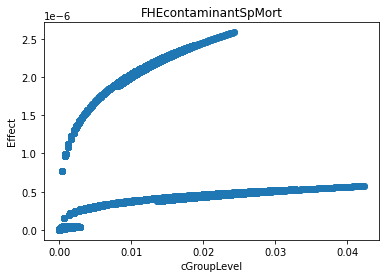

In [6]:
# Plotting the data (optional, requires matplotlib)
plt.scatter(contaminant_effect['cGroupLevel'], contaminant_effect['Effect'])
plt.xlabel('cGroupLevel')
plt.ylabel('Effect')
plt.title(pattern)
plt.show()

In [7]:
filename = "FHE-kgrowth"
pattern = 'C_growth_corr'

# First condition: keep rows with pattern
contaminant_row_data = [line for line in row_text if re.search(pattern, line)]

# Function to extract the desired words from each line
def extract_word(line, position):
    words = line.split()
    return words[position - 1] if len(words) >= position else None

# Extract data into lists
time = [float(extract_word(line, 2)) for line in contaminant_row_data]
group = [extract_word(line, 4) for line in contaminant_row_data]
contam = [extract_word(line, 5) for line in contaminant_row_data]
cGroupLevel = [float(extract_word(line, 7)) for line in contaminant_row_data]
effect = [float(extract_word(line, 9)) for line in contaminant_row_data]

# Create a pandas DataFrame
contaminant_effect = pd.DataFrame({
    'Time': time,
    'Group': group,
    'Contaminant': contam,
    'cGroupLevel': cGroupLevel,
    'Effect': effect
})

# Save the data to a CSV file
contaminant_effect.to_csv(filename+".csv", index=False)

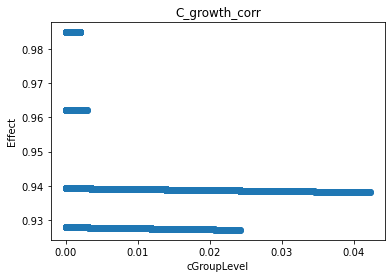

In [8]:
# Plotting the data (optional, requires matplotlib)
plt.scatter(contaminant_effect['cGroupLevel'], contaminant_effect['Effect'])
plt.xlabel('cGroupLevel')
plt.ylabel('Effect')
plt.title(pattern)
plt.show()